# Graphe pyplot construite avec les données de la liaison série

## La ou les graphes peuvent être faits avec une carte Arduino ou une Carte Microbit

###  Exemple utilisé : Transfert par radio entre 2 cartes Microbit de données d'un capteur de température Grove

In [5]:
import serial,json # bibliothèque pyserial à installer
import matplotlib.pyplot as plt
from os import path
from IPython.display import clear_output

In [18]:
def graph(x,y,z,seuil=100):
    x = x[-seuil:] if len(x)>seuil else x #prend les 100 dernières valeurs
    y = y[-seuil:] if len(y)>seuil else y
    z = z[-seuil:] if len(z)>seuil else z    
    plt.plot(x,y, label='PM2.5 from serial')
    plt.plot(x,z, label='PM10 from serial')
    plt.xlabel('temps (s)')
    plt.ylabel('PM 2.5 - PM 10')
    plt.title('How to plot serial data with pyplot')
    plt.legend()
    plt.show(block=False)

In [19]:
def sauvegarde():
    question = "Voulez-vous sauvegarder les données collectées ? [Oui/non]"
    while (demande := input(question).lower()) not in ["","oui","non"] : pass #marche seulement en 3.8.5 opérateur morse
    return False if demande == "non" else True

In [24]:
def writer(file,line,data):
    fichier = open(file,"a")
    data["ligne"] = i
    fichier.write(json.dumps(data)) # écriture dans le fichier
    fichier.write("\n")
    fichier.close() #on ferme le fichier, on ouvre écrit et ferme rapidement en attendant la prochaine ligne

{'Temps': 5252195, 'PM 2.5': 8.1, 'PM 10': 15.0}


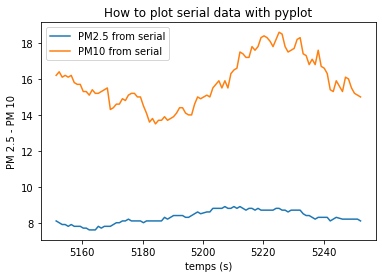

In [25]:
ser = serial.Serial('/dev/ttyACM0',115200) # Port de la carte Microbit ou Arduino ou ttyUSBx ou COMx
x,y,z = [], [], []
file = 'donnees.tmp'
stock = sauvegarde()
if stock and path.exists(file):
    fichier = open(file,"w") #vide le fichier donnée
    fichier.close()
for i in range(120) :	#1000 lignes, on peut modifier si besoin
    line = ser.readline().decode('utf8')# lecture de la ligne du port série,
    try :
        data = json.loads(line.replace("'",'"'))
        print(data) 
    except json.JSONDecodeError:
        print(line)
        continue
    x.append(data['Temps']/1000) # temps en seconde
    y.append(data["PM 2.5"])
    z.append(data["PM 10"])
    if stock: writer(file,i,data)
    graph(x,y,z)
    clear_output(wait=True)

ser.close()		# on ferme le port série